In [ ]:
# Load Data
import pandas as pd

total_data = pd.read_csv("housing.csv")
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Take essential data
x = total_data[["MedInc", "Latitude", "Longitude"]]
x.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [ ]:
# Split into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x, test_size = 0.2, random_state = 42)

x_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [ ]:
# Create means model
from sklearn.cluster import KMeans

unsup_model = KMeans(n_clusters = 3, random_state=42)
unsup_model.fit(x_train)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [ ]:
# Create cluster column using model
x_train["cluster"] = unsup_model.labels_
x_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,1
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,1
2271,3.5542,36.78,-119.80,0


<Axes: xlabel='Longitude', ylabel='MedInc'>

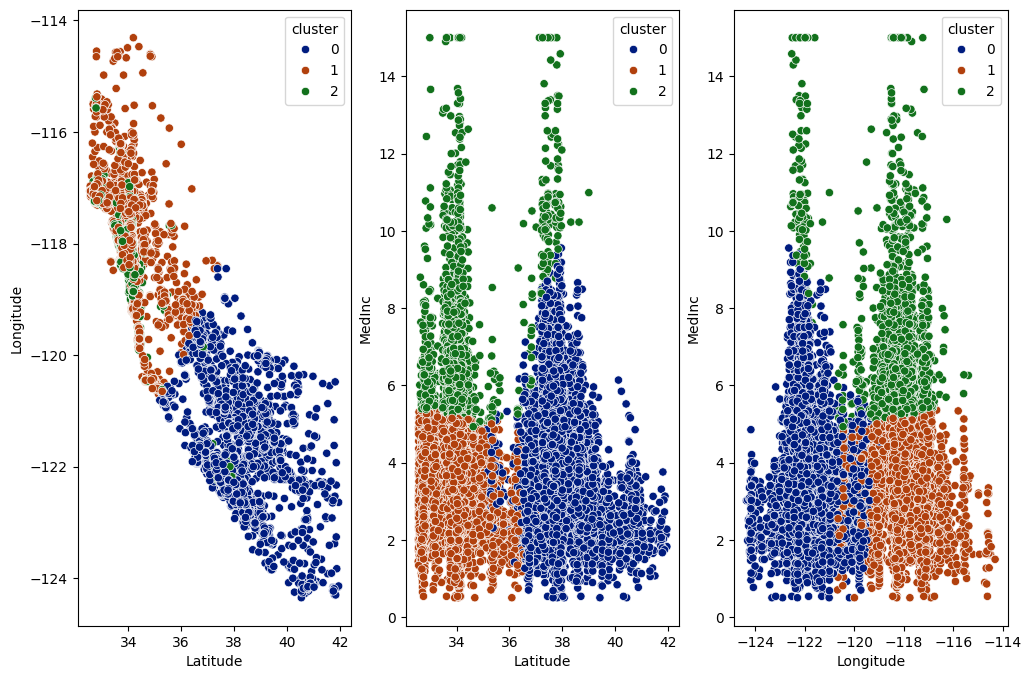

In [ ]:
# Plot data
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (12, 8))

sns.scatterplot(ax = axis[0], data = x_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "dark")
sns.scatterplot(ax = axis[1], data = x_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "dark")
sns.scatterplot(ax = axis[2], data = x_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "dark")


In [ ]:
# Predict cluster using test data
x_test["cluster"] = unsup_model.predict(x_test)

x_test.head()



,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,1
3024,2.5313,35.14,-119.46,1
15663,3.4801,37.80,-122.44,0
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,0


<function seaborn.relational.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)>

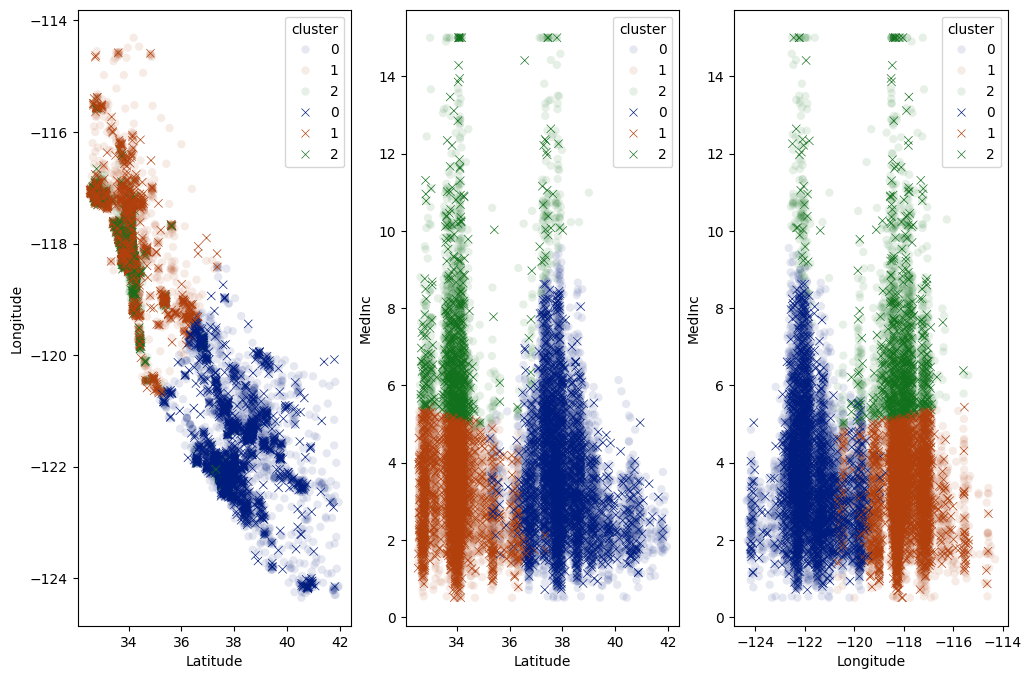

In [ ]:
# Display both train and test data
fig, axis = plt.subplots(1, 3, figsize = (12, 8))

sns.scatterplot(ax = axis[0], data = x_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "dark", alpha = .1)
sns.scatterplot(ax = axis[1], data = x_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "dark", alpha = .1)
sns.scatterplot(ax = axis[2], data = x_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "dark", alpha = .1)

sns.scatterplot(ax = axis[0], data = x_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "dark", marker = "x")
sns.scatterplot(ax = axis[1], data = x_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "dark", marker = "x")
sns.scatterplot(ax = axis[2], data = x_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "dark", marker = "x")

sns.scatterplot

In [ ]:
# Supervised learning, split data
y_train = x_train["cluster"]
y_test = x_test["cluster"]

x_train.drop("cluster", axis=1)
x_test.drop("cluster", axis=1)


,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93
...,...,...,...
15362,4.6050,33.36,-117.22
16623,2.7266,35.36,-120.83
18086,9.2298,37.31,-122.05
2144,2.7850,36.77,-119.76


In [ ]:
# Use random forst classifier
from sklearn.ensemble import RandomForestClassifier

sup_model = RandomForestClassifier(random_state = 42)
sup_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Predict y off of x test
predict_y = sup_model.predict(x_test)
predict_y

array([1, 1, 0, ..., 2, 0, 1], shape=(4128,), dtype=int32)

In [ ]:
# Check accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predict_y)

1.0

In [ ]:
# Save both sup and unsup models
from pickle import dump

dump(unsup_model, open("unsup_model_k-means_random_state-42.sav", "wb"))
dump(sup_model, open("sup_model_random-forest_random_state-42.sav", "wb"))
